### Load tensorflow

In [1]:
import tensorflow as tf

C:\AIML\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()

### Collect Data

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('prices.csv')

### Check all columns in the dataset

In [5]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
data.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

### Drop columns `date` and  `symbol`

In [7]:
data.drop(labels=['date','symbol'],axis=1,inplace=True)

In [8]:
data.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


### Consider only first 1000 rows in the dataset for building feature set and target set

In [9]:
data.shape

(851264, 5)

In [10]:
df = data.head(1000)
df.shape

(1000, 5)

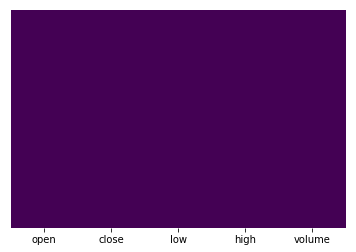

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
import numpy as np
np.any(np.isnan(df))

False

### Divide the data into train and test sets

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('close', axis=1)
Y = df['close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

In [14]:
print('Train Features shape:',X_train.shape)
print('Train Closing Price shape:',Y_train.shape)
print('Test Features shape:',X_test.shape)
print('Test Closing Price shape:',Y_test.shape)

Train Features shape: (800, 4)
Train Closing Price shape: (800,)
Test Features shape: (200, 4)
Test Closing Price shape: (200,)


## Building the graph in tensorflow

1.Define input data placeholders

In [15]:
#Input features
x_train = tf.placeholder(shape=[None,4],dtype=tf.float32, name='x-input')
x_train_n = tf.layers.batch_normalization(x_train, training=True)
x_test = tf.placeholder(shape=[None,4],dtype=tf.float32, name='x-input')
x_test_n = tf.layers.batch_normalization(x_test, training=True)

#Actual Closing Price
y_train = tf.placeholder(shape=[None],dtype=tf.float32, name='y-input')
y_test = tf.placeholder(shape=[None],dtype=tf.float32, name='y-input')

2.Define Weights and Bias

In [16]:
W = tf.Variable(tf.zeros(shape=[4,1]), name="Weights")
b = tf.Variable(tf.zeros(shape=[1]), name="Bias")

3.Prediction

In [17]:
y1 = tf.add(tf.matmul(x_train_n,W),b,name='output')
y2 = tf.add(tf.matmul(x_test_n,W),b,name='output')

4.Loss (Cost) Function [Mean square error]

In [18]:
loss_train = tf.reduce_mean(tf.square(y1-y_train),name='Loss')
loss_test = tf.reduce_mean(tf.square(y2-y_test),name='Loss')

5.GradientDescent Optimizer to minimize Loss [GradientDescentOptimizer]

In [19]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss_train)
test_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss_test)

## Execute the Graph for 100 epochs and observe the loss

In [20]:
#Lets start graph Execution
sess = tf.Session()

# variables need to be initialized before we can use them
sess.run(tf.global_variables_initializer())

#how many times data need to be shown to model
training_epochs = 100

In [21]:
train_loss_items = []
for epoch in range(training_epochs):            
    #Calculate train_op and loss
    _, train_loss = sess.run([train_op, loss_train],feed_dict={x_train:X_train,y_train:Y_train})
    if epoch % 10 == 0:
        print ('Training loss at step: ', epoch, ' is ', train_loss)
        train_loss_items.insert(0,train_loss)

Training loss at step:  0  is  8130.966
Training loss at step:  10  is  6635.581
Training loss at step:  20  is  5342.178
Training loss at step:  30  is  3632.9517
Training loss at step:  40  is  3632.4587
Training loss at step:  50  is  3632.4688
Training loss at step:  60  is  3632.4607
Training loss at step:  70  is  3632.4531
Training loss at step:  80  is  3632.4487
Training loss at step:  90  is  3632.44


### Get the shapes and values of W and b

Hint: Use sess.run(W) to get W.

In [22]:
w_val = sess.run(W)

In [23]:
w_val

array([[ 4.125386  ],
       [-4.5387883 ],
       [ 2.3288186 ],
       [-0.05081662]], dtype=float32)

In [24]:
w_val.shape

(4, 1)

### Find the Absolute mean square loss difference between training and testing loss.

In [25]:
test_loss_items=[]
testing_epochs = 100
for epoch in range(testing_epochs):            
    #Calculate test_op and loss
    _, test_loss = sess.run([test_op, loss_test],feed_dict={x_test:X_test,y_test:Y_test})
    if epoch % 10 == 0:
        print ('Testing loss at step: ', epoch, ' is ', test_loss)
        test_loss_items.insert(0,test_loss)

Testing loss at step:  0  is  4219.521
Testing loss at step:  10  is  2480.9385
Testing loss at step:  20  is  2480.9216
Testing loss at step:  30  is  2480.923
Testing loss at step:  40  is  2480.9236
Testing loss at step:  50  is  2480.9238
Testing loss at step:  60  is  2480.923
Testing loss at step:  70  is  2480.9229
Testing loss at step:  80  is  2480.923
Testing loss at step:  90  is  2480.921


In [26]:
tf.metrics.mean_absolute_error(train_loss_items, test_loss_items)

(<tf.Tensor 'mean_absolute_error/value:0' shape=() dtype=float32>,
 <tf.Tensor 'mean_absolute_error/update_op:0' shape=() dtype=float32>)

### Linear Classification using Keras

### Building the simple Neural Network in Keras with one neuron in the dense hidden layer.
#### Use Mean square error as loss function and sgd as optimizer

In [27]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(4,)))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(1))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 4)                 16        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 21
Trainable params: 13
Non-trainable params: 8
_________________________________________________________________


### Execute the model

In [29]:
model.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/1
800/800 [==============================] - 0s 32us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


In [30]:
sess.close()

### Classification using Keras 

In [4]:
tf.reset_default_graph()
tf.set_random_seed(42)

### Load the given Iris data using pandas (Iris.csv)

In [5]:
data = pd.read_csv('Iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting the data into feature set and target set

In [7]:
X = data.drop(labels=['Id','Species'],axis=1)
Y = data['Species']

### Target set has different categories. So, Label encode them. And convert into one-hot vectors using get_dummies in pandas.

In [8]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
Y_vec = pd.get_dummies(Y)

### Divide the dataset into Training and test (70:30)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_vec, test_size=0.3, random_state=None)

### Model
Build the model with following layers: <br>
1. First dense layer with 10 neurons with input shape 4 (according to the feature set) <br>
2. Second Dense layer with 8 neurons <br>
3. Output layer with 3 neurons with softmax activation (output layer, 3 neurons as we have 3 classes) <br>
4. Use SGD and categorical_crossentropy loss 

In [12]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize the data
model.add(tf.keras.layers.BatchNormalization(input_shape=(4,)))

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(8, activation='relu'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [13]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting the model and predicting 

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 4)                 16        
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 181
Trainable params: 173
Non-trainable params: 8
_________________________________________________________________


In [18]:
model.fit(X_train,Y_train,          
          validation_data=(X_test,Y_test),
          epochs=30,
          batch_size=32)

Train on 105 samples, validate on 45 samples
Epoch 1/30
105/105 [==============================] - 0s 76us/step - loss: 0.2066 - acc: 0.9238 - val_loss: 0.1903 - val_acc: 0.9111
Epoch 2/30
105/105 [==============================] - 0s 66us/step - loss: 0.2436 - acc: 0.9524 - val_loss: 0.1994 - val_acc: 0.9111
Epoch 3/30
105/105 [==============================] - 0s 57us/step - loss: 0.1980 - acc: 0.9524 - val_loss: 0.1846 - val_acc: 0.9111
Epoch 4/30
105/105 [==============================] - 0s 66us/step - loss: 0.2031 - acc: 0.9619 - val_loss: 0.1869 - val_acc: 0.9111
Epoch 5/30
105/105 [==============================] - 0s 57us/step - loss: 0.2075 - acc: 0.9429 - val_loss: 0.1747 - val_acc: 0.9556
Epoch 6/30
105/105 [==============================] - 0s 66us/step - loss: 0.2112 - acc: 0.9524 - val_loss: 0.1725 - val_acc: 0.9556
Epoch 7/30
105/105 [==============================] - 0s 104us/step - loss: 0.1688 - acc: 0.9714 - val_loss: 0.1699 - val_acc: 0.9556
Epoch 8/30
105/105 [===

### Report Accuracy of the predicted values

In [ ]:
# The maximum accuracy it reached was almost - 97%